### TP 3: Visión por Computadora

Alumnos: Fabricio Lopretto (a1616), Santiago José Olaciregui (a1611)

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [2]:
# Instala las librerias necesarias
%pip install opencv-python
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Importa las librerias necesarias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [2]:
# Capta la ruta de la notebook
ruta_notebook = os.getcwd()

# Describe la ruta al template
template_path = ruta_notebook + '/template/'

# Describe la ruta a la carperta de imagenes
images_path = ruta_notebook + '/images/'

# Describe la ruta a la carperta de imagenes preprocesadas
images_canny_path = ruta_notebook + '/images_canny/'


In [8]:
# Ruta de las imagenes
images = [
    'coca_logo_1.png',
    'coca_logo_2.png',
    'coca_multi.png',
    'coca_retro_1.png',
    'coca_retro_2.png',
    'COCA-COLA-LOGO.jpg',
    'logo_1.png'
    ]

Se realiza una primera función que realice todas las detecciones disponibles.

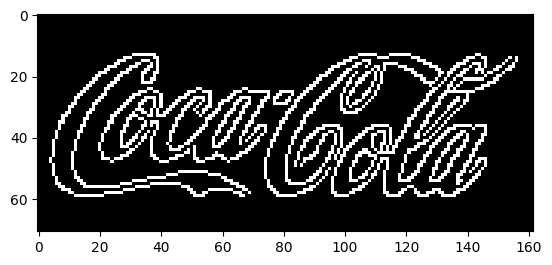

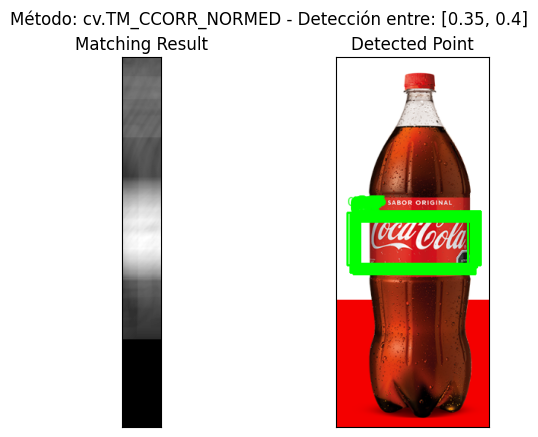

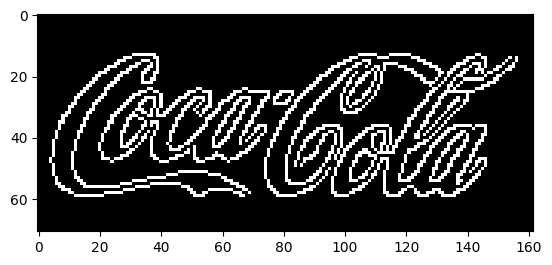

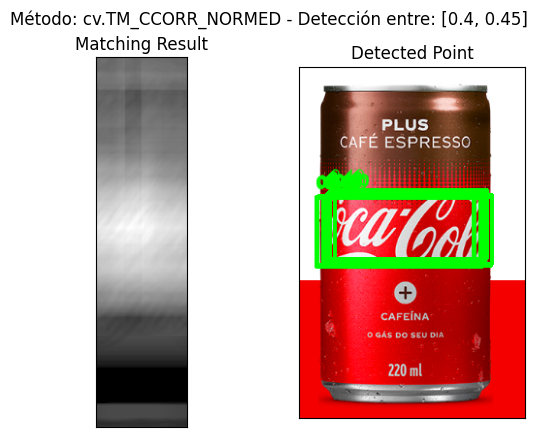

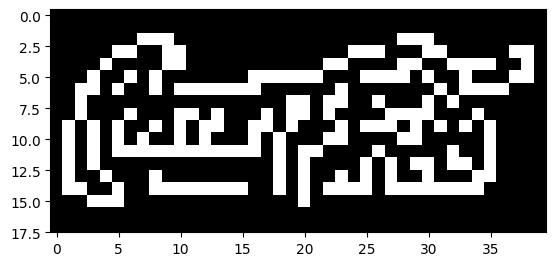

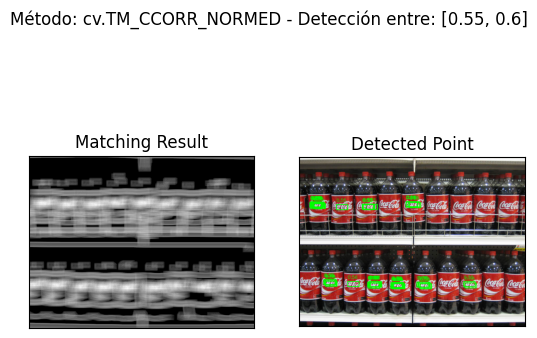

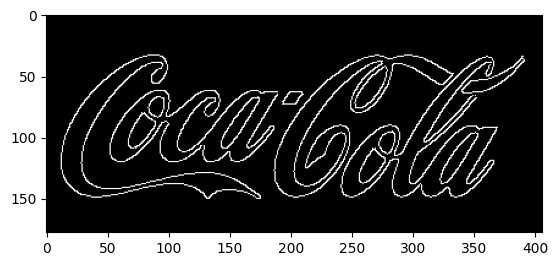

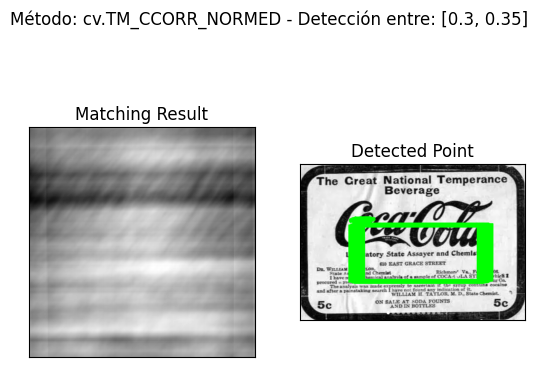

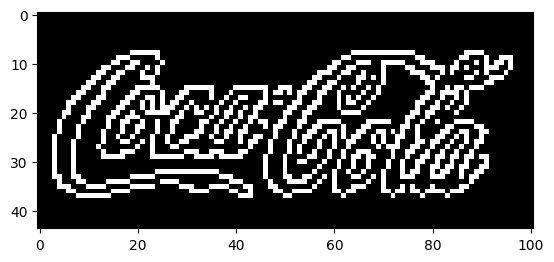

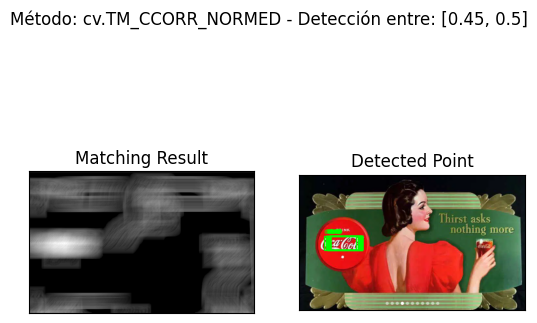

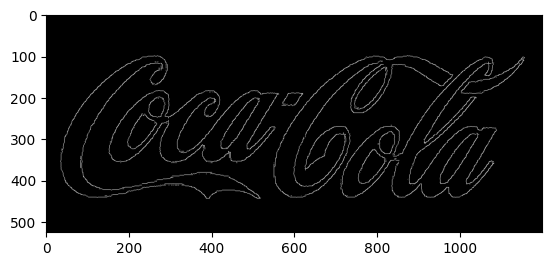

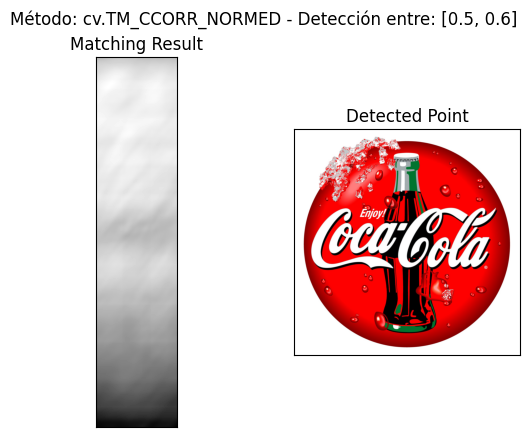

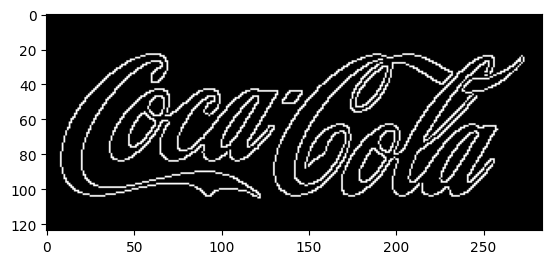

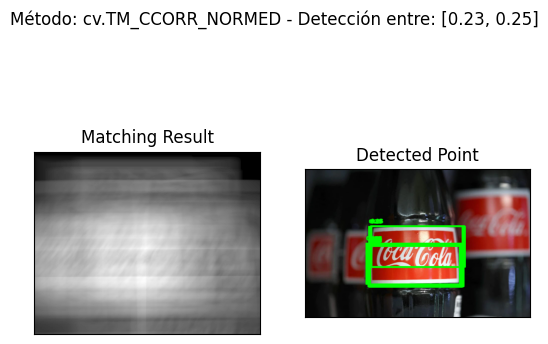

In [132]:
# Define la funcion de deteccion
def deteccion_generalizada(name_imagen_original):
    """
    Identifica a traves de Template Matching el logo
    en la imagen ingresada, previo preprocesamiento
    del template y de la imagen, para todas los valores
    de métrica por encima de un umbral.

    Parámetros:
    name_ruta_imagen_original: nombre del archivo de la imagen original.
    umbral: valor mínimo de la métrica utilizado en la detección.
    """

    # Define el metodo con el cual hacer el matching
    meth = 'cv.TM_CCORR_NORMED'

    # Ruta de la notebook
    ruta_notebook = os.getcwd()
    # Ruta a las imagenes
    images_path = ruta_notebook + '/images/'
    # Ruta al template
    template_path = ruta_notebook + '/template/'
    # Ruta a las imagenes binarias preprocesadas
    images_canny_path = ruta_notebook + '/images_canny/'
    # Ruta a las imagenes con detecciones
    images_detect_path = ruta_notebook + '/images_detections/multi_match_gral/'

    # Define los tamaños de template a utilizar
    ruta_template = {'coca_logo_1.png':'pattern_2.png',
                'coca_logo_2.png':'pattern_2.png',
                'coca_multi.png':'pattern_0.png',
                'coca_retro_1.png':'pattern_6.png',
                'coca_retro_2.png':'pattern_1.png',
                'COCA-COLA-LOGO.jpg':'pattern_19.png',
                'logo_1.png':'pattern_4.png'}

    # Define las imagenes binarias a utilizar
    ruta_canny = {'coca_logo_1.png':'canny_coca_logo_1.png',
                'coca_logo_2.png':'canny_coca_logo_2.png',
                'coca_multi.png':'canny_coca_multi.png',
                'coca_retro_1.png':'canny_coca_retro_1.png',
                'coca_retro_2.png':'canny_coca_retro_2.png',
                'COCA-COLA-LOGO.jpg':'canny_COCA-COLA-LOGO.png',
                'logo_1.png':'canny_logo_1.png'}
    
    umbral = {'coca_logo_1.png':[0.35, 0.40],
            'coca_logo_2.png':[0.40, 0.45],
            'coca_multi.png':[0.55, 0.60],
            'coca_retro_1.png':[0.30, 0.35],
            'coca_retro_2.png':[0.45, 0.50],
            'COCA-COLA-LOGO.jpg':[0.50, 0.60],
            'logo_1.png':[0.23, 0.25]}
    
    # Visualiza el template en escala de grises
    template = cv.imread(template_path + ruta_template[name_imagen_original],0)

    # Aplica el filtro Canny al template
    template_canny = cv.Canny(template, 50, 150)

    # Muestra el template con Canny aplicado
    plt.figure()
    plt.imshow(template_canny, cmap='gray')

    # Toma las dimensiones del template
    w, h = template_canny.shape[::-1]

    # Carga la imagen original
    imagen_original = cv.imread(images_path + name_imagen_original)
    img_ori = cv.cvtColor(imagen_original, cv.COLOR_BGR2RGB)

    # Realiza una copia de la imagen para la salida
    img_salida = img_ori.copy()

    # Carga la imagen binaria en escala de grises
    imagen_canny = cv.imread(images_canny_path + ruta_canny[name_imagen_original])
    img_gray = cv.cvtColor(imagen_canny, cv.COLOR_BGR2GRAY)

    # Aplica la coincidencia de patrones con la imagen de bordes
    res = cv.matchTemplate(img_gray, template, eval(meth))

    # Identificacion de la metrica en un umbral para no saturar
    match_locations = np.where(np.logical_and(res >= umbral[name_imagen_original][0], res <= umbral[name_imagen_original][1]))

    # Dibuja un rectangulo y añade el valor de la metrica en verde para cada coincidencia
    for pt in zip(*match_locations[::-1]):  # Invierte las coordenadas
        bottom_right = (pt[0] + w, pt[1] + h)
        cv.rectangle(img_salida, pt, bottom_right, (0, 255, 0), 2)

        # Extrae el valor de la metrica en las coordenadas de coincidencia
        valor_metric = res[pt[1], pt[0]]

        # Escribe el valor de la metrica en la esquina superior izquierda del rectangulo
        texto = f'{valor_metric:.2f}'
        cv.putText(img_salida, texto, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv.LINE_AA)

    # Grafica el procesamiento y la salida
    plt.figure()     
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(f'Método: {meth} - Detección entre: {umbral[name_imagen_original]}')
    plt.savefig(images_detect_path + 'match_multi_' + name_imagen_original, bbox_inches='tight', pad_inches=0)
    plt.show()

# Aplica la funcion a cada imagen
for imag in images:
    deteccion_generalizada(imag)


Se ajusta la función previa de forma tal de que no imprima detecciones muy cercanas a una previa a través del uso de umbrales de ubicación.

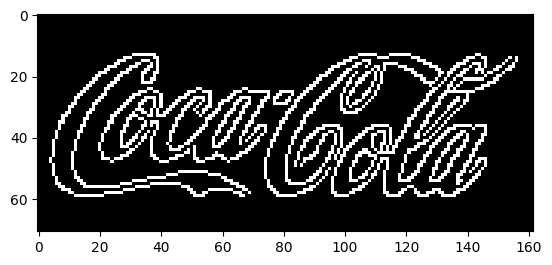

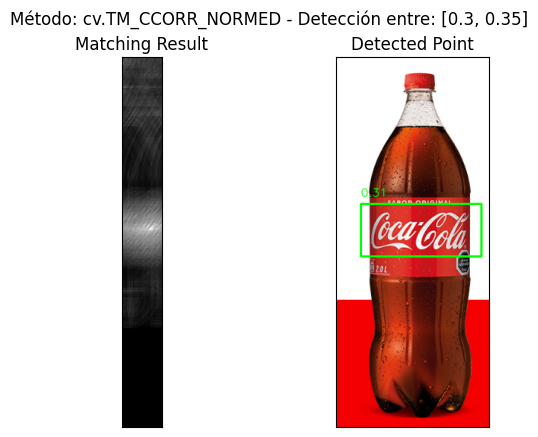

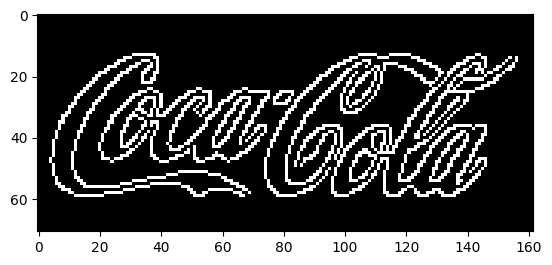

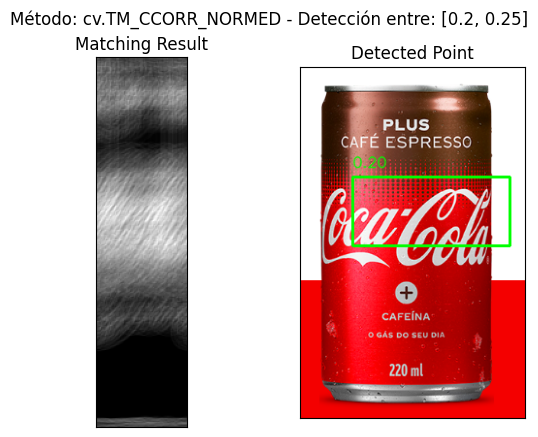

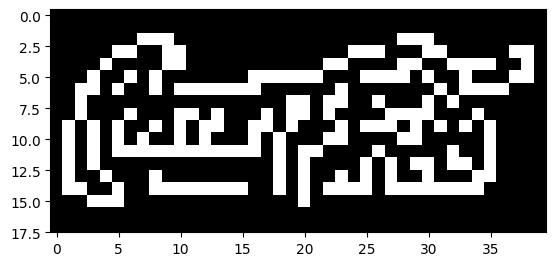

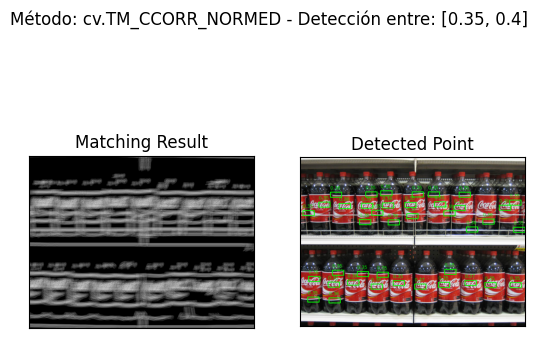

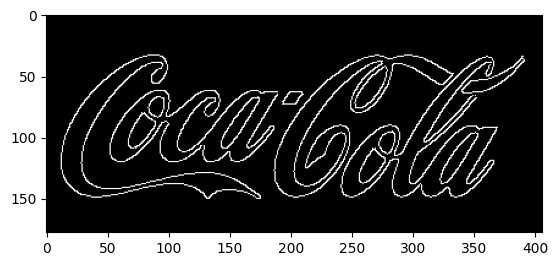

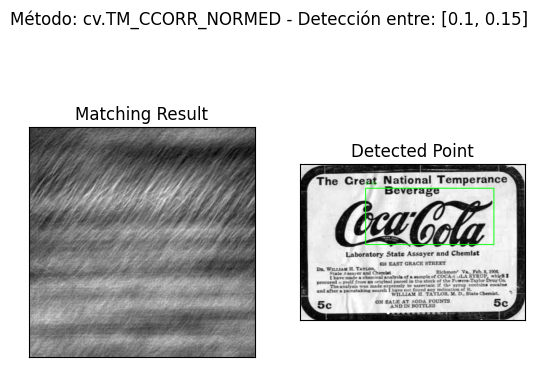

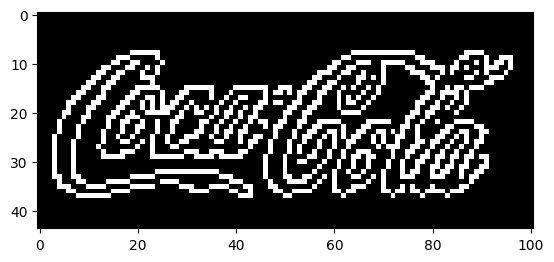

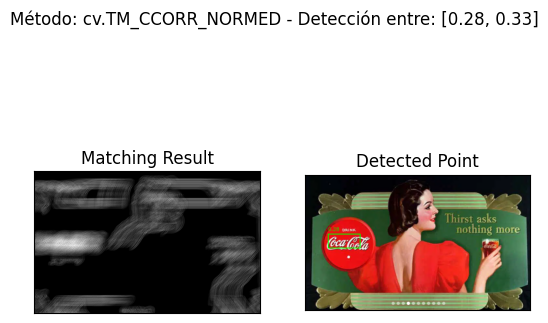

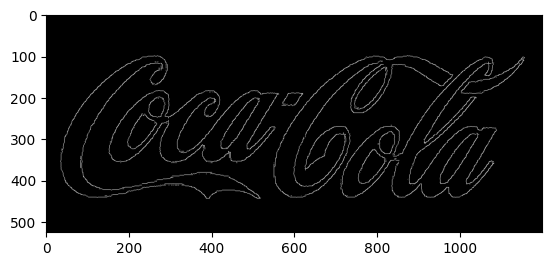

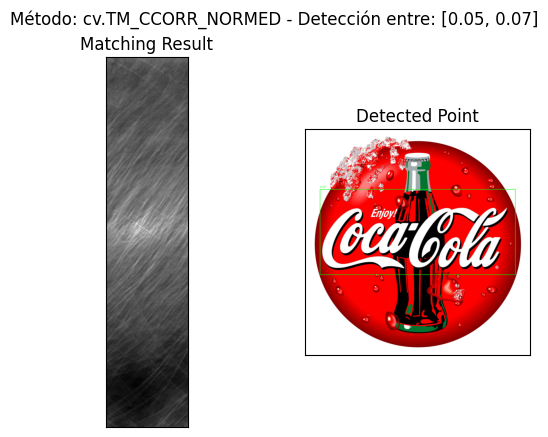

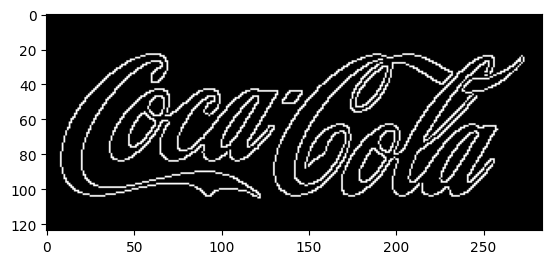

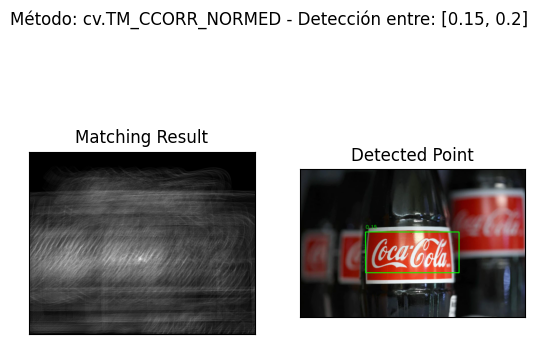

In [147]:
def deteccion_generalizada(name_imagen_original):
    """
    Identifica a través de Template Matching el logo
    en la imagen ingresada, previo preprocesamiento
    del template y de la imagen, para todas las coincidencias
    de métrica por encima de un umbral.

    Parámetros:
    name_imagen_original: nombre del archivo de la imagen original.
    """
    # Define el metodo con el cual hacer el matching
    meth = 'cv.TM_CCORR_NORMED'

    # Ruta de la notebook
    ruta_notebook = os.getcwd()
    # Ruta a las imagenes
    images_path = ruta_notebook + '/images/'
    # Ruta al template
    template_path = ruta_notebook + '/template/'
    # Ruta a las imagenes binarias preprocesadas
    images_canny_path = ruta_notebook + '/images_canny/'
    # Ruta a las imagenes con detecciones
    images_detect_path = ruta_notebook + '/images_detections/multi_match_gral/'

    # Define los tamaños de template a utilizar
    ruta_template = {'coca_logo_1.png':'pattern_2.png',
                     'coca_logo_2.png':'pattern_2.png',
                     'coca_multi.png':'pattern_0.png',
                     'coca_retro_1.png':'pattern_6.png',
                     'coca_retro_2.png':'pattern_1.png',
                     'COCA-COLA-LOGO.jpg':'pattern_19.png',
                     'logo_1.png':'pattern_4.png'}

    # Define las imagenes binarias a utilizar
    ruta_canny = {'coca_logo_1.png':'canny_coca_logo_1.png',
                  'coca_logo_2.png':'canny_coca_logo_2.png',
                  'coca_multi.png':'canny_coca_multi.png',
                  'coca_retro_1.png':'canny_coca_retro_1.png',
                  'coca_retro_2.png':'canny_coca_retro_2.png',
                  'COCA-COLA-LOGO.jpg':'canny_COCA-COLA-LOGO.png',
                  'logo_1.png':'canny_logo_1.png'}

    umbral = {'coca_logo_1.png':[0.30, 0.35],
              'coca_logo_2.png':[0.20, 0.25],
              'coca_multi.png':[0.35, 0.40],
              'coca_retro_1.png':[0.10, 0.15],
              'coca_retro_2.png':[0.28, 0.33],
              'COCA-COLA-LOGO.jpg':[0.05, 0.07],
              'logo_1.png':[0.15, 0.20]}

    # Carga el template en escala de grises
    template = cv.imread(template_path + ruta_template[name_imagen_original], 0)

    # Aplica el filtro Canny al template
    template_canny = cv.Canny(template, 50, 150)

    # Muestra el template con Canny aplicado
    plt.figure()
    plt.imshow(template_canny, cmap='gray')

    # Toma las dimensiones del template
    w, h = template_canny.shape[::-1]

    # Carga la imagen original
    imagen_original = cv.imread(images_path + name_imagen_original)
    img_ori = cv.cvtColor(imagen_original, cv.COLOR_BGR2RGB)

    # Realiza una copia de la imagen para la salida
    img_salida = img_ori.copy()

    # Carga la imagen binaria en escala de grises
    imagen_canny = cv.imread(images_canny_path + ruta_canny[name_imagen_original])
    img_gray = cv.cvtColor(imagen_canny, cv.COLOR_BGR2GRAY)

    # Aplica la coincidencia de patrones con la imagen de bordes
    res = cv.matchTemplate(img_gray, template_canny, eval(meth))

    # Identificacion de la metrica en un umbral
    match_locations = np.where((umbral[name_imagen_original][1] >= res) & (res >= umbral[name_imagen_original][0]))

    # Lista para almacenar posiciones de rectangulos ya dibujados
    rect_positions = []

    # Dibuja un rectangulo y añade el valor de la metrica en verde para cada coincidencia
    for pt in zip(*match_locations[::-1]):  # Invierte las coordenadas
        # Si es el primer rectangulo, se dibuja sin restricciones
        if not rect_positions:
            draw_rectangle(pt, img_salida, w, h, res)
            rect_positions.append(pt)  # Guarda la posicion del primer rectangulo
        else:
            # Verifica si la nueva posicion esta lo suficientemente lejos de las anteriores
            if all(np.linalg.norm(np.array(pt) - np.array(pos)) >= max(w, h) for pos in rect_positions):
                draw_rectangle(pt, img_salida, w, h, res)
                rect_positions.append(pt)  # Guarda la posicion del nuevo rectangulo

    # Grafica el procesamiento y la salida
    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(f'Método: {meth} - Detección entre: {umbral[name_imagen_original]}')
    plt.savefig(images_detect_path + 'match_multi_' + name_imagen_original, bbox_inches='tight', pad_inches=0)
    plt.show()

def draw_rectangle(pt, img, w, h, res):
    """
    Dibuja un rectángulo en la imagen y escribe la métrica en verde
    en la esquina superior izquierda del rectángulo.
    """
    bottom_right = (pt[0] + w, pt[1] + h)
    cv.rectangle(img, pt, bottom_right, (0, 255, 0), 2)

    # Extrae el valor de la metrica en las coordenadas de coincidencia
    valor_metric = res[pt[1], pt[0]]

    # Escribe el valor de la metrica en la esquina superior izquierda del rectangulo
    texto = f'{valor_metric:.2f}'
    cv.putText(img, texto, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv.LINE_AA)

# Aplica la funcion a cada imagen
for imag in images:
     deteccion_generalizada(imag)

Observaciones:

Para este caso se tomaron aspectos de las funciones definidas en los puntos 1 y 2. Nuevamente se utilizan diferentes tamaños de template con las imagenes binarias armadas a través del uso de filtros gaussiano y de canny.

Para evitar la superposición de detecciones, se incorporó en este caso no solamente un márgen inferior sino también uno superior. Además. si adicionó código para evitar plotear un rectángulo en un vecindario cercano a otro previamente ploteado. Esta distancia se definió como el valor máximo entre el ancho y alto del template.

A partir de los resultados se pudo ver que si bien la función logra realizar detecciones, no queda ajena a falsos positivos (ver imagen 'coca_multi') como verdaderos negativos (ver imagen coca_retro_2). No obstante, en la mayoría de los casos devuelve resultados favorables.